In [6]:
pip install arrow

    100% |████████████████████████████████| 51kB 1.2MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
# -*- coding: utf-8 -*-
%matplotlib inline

import agate
import warnings
import requests
import zipfile
import io
import json
import unicodedata

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import locale
import arrow
import xml.etree.ElementTree as ET

from locale import atof
from dateutil import parser
from datetime import datetime

matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['font.size'] = 10

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df = pd.read_csv("2017_tweets_grouped.csv")

firstTweet = True
compound_list =[]
sentiments =[]
count =0

for index, row in df.iterrows():
    #Run Vader Analysis on each tweet
    sentence =row["text"]
    #Tweet datetime object
    new_date = row["created_at"]
    if(firstTweet == False):
        if(old_date != new_date):
            compound= np.mean(compound_list)
            compound_list =[]
            #Store the Sentiments
            sentiments.append({"Compound":compound,
                "Date" : old_date,
                "Count" : count})
            #Resetting count
            count =0
    else:
        firstTweet = False
    compound_list.append(analyzer.polarity_scores(sentence)["compound"])
    count +=1
    old_date = new_date
	
#Put all data into dataframe and export to csv file
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df

,Compound,Count,Date
0,0.068473,11,2017-01-20
1,0.436867,3,2017-01-21
2,0.244400,4,2017-01-22
3,0.493900,1,2017-01-23
4,0.354225,4,2017-01-24
5,0.058888,8,2017-01-25
6,0.080818,11,2017-01-26
7,0.287157,7,2017-01-27
8,-0.090020,5,2017-01-28
9,-0.403371,7,2017-01-29


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

tweet = pd.read_csv("2017_tweets_grouped.csv")
tweet.head()

,text,created_at,Unique Identifier
0,It all begins today! I will see you at 11:00 A...,2017-01-20,1.0
1,Today we are not merely transferring power fro...,2017-01-20,1.0
2,power from Washington D.C. and giving it back ...,2017-01-20,1.0
3,What truly matters is not which party controls...,2017-01-20,1.0
4,January 20th 2017 will be remembered as the da...,2017-01-20,1.0


In [19]:
df2 = pd.read_csv("SentimentvsStocks2017.csv")
df2.head()

,Compound,Count,Date,Open,High,Low,Close,Adj Close,Volume,Avg Return
0,0.068473,11,2017-01-20,2269.959961,2276.959961,2265.010010,2271.310059,2271.310059,3.524970e+09,0.059477
1,0.436867,3,2017-01-21,2269.959961,2276.959961,2265.010010,2271.310059,2271.310059,3.524970e+09,0.059477
2,0.244400,4,2017-01-22,2269.959961,2276.959961,2265.010010,2271.310059,2271.310059,3.524970e+09,0.059477
3,0.493900,1,2017-01-23,2267.780029,2271.780029,2257.020020,2265.199951,2265.199951,3.152710e+09,-0.113771
4,0.354225,4,2017-01-24,2267.879883,2284.629883,2266.679932,2280.070068,2280.070068,3.810960e+09,0.537515


In [20]:
df2.describe()


,Compound,Count,Open,High,Low,Close,Adj Close,Volume,Avg Return
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,0.224349,7.101449,2457.312799,2463.383471,2451.120169,2458.324531,2458.324531,3.409930e+09,0.041666
std,0.310724,4.421620,104.670069,104.392911,104.719112,104.707334,104.707334,6.102541e+08,0.311661
min,-0.934000,1.000000,2267.780029,2271.780029,2257.020020,2265.199951,2265.199951,1.349780e+09,-1.483619
25%,0.000000,4.000000,2375.229980,2383.889893,2369.659912,2378.250000,2378.250000,3.106150e+09,-0.109226
50%,0.242975,6.000000,2439.310059,2446.199951,2433.270020,2439.070068,2439.070068,3.367220e+09,0.053607
75%,0.424325,10.000000,2540.860107,2549.409912,2540.020020,2544.729980,2544.729980,3.621070e+09,0.223619
max,0.950100,32.000000,2692.709961,2694.969971,2685.919922,2690.159912,2690.159912,5.723920e+09,0.809692


In [21]:
# Convert compound sentiment range max being 1 and min being -1 into percentage. i.e -1 = 0% and 1 =100%
#((input - min) * 100) / (max - min)
max=1
min =-1
for index, row in df2.iterrows():
    d= ((row['Compound'] - min) * 100) / (max - min)
    df2.loc[index, 'Compound'] = d
df2.head()

# Convert compound sentiment range max being 1 and min being -1 into percentage. i.e -1 = 0% and 1 =100%
#((input - min) * 100) / (max - min)
max=2690
min =2550
for index, row in df.iterrows():
    d= ((row['Close'] - min)*1000) / (max - min)
    df2.loc[index, 'Close'] = d
df2.head()

,Compound,Count,Date,Open,High,Low,Close,Adj Close,Volume,Avg Return
0,53.423636,11.0,2017-01-20,2269.959961,2276.959961,2265.010010,-3130.571636,2271.310059,3.524970e+09,0.059477
1,71.843333,3.0,2017-01-21,2269.959961,2276.959961,2265.010010,-3229.000421,2271.310059,3.524970e+09,0.059477
2,62.220000,4.0,2017-01-22,2269.959961,2276.959961,2265.010010,-3295.286343,2271.310059,3.524970e+09,0.059477
3,74.695000,1.0,2017-01-23,2267.780029,2271.780029,2257.020020,-3320.143343,2265.199951,3.152710e+09,-0.113771
4,67.711250,4.0,2017-01-24,2267.879883,2284.629883,2266.679932,-2989.142714,2280.070068,3.810960e+09,0.537515


In [22]:
df2 = df2.dropna(subset=['Compound'])

## Each point on the sine chart is marked by a blue circle


In [23]:
df3=pd.read_csv("TrumpCleanedApprovalRating2017.csv")
df3.head()

,Start Date,End Date,Unique Identifier,Average of adjusted_approve,Average of adjusted_disapprove
0,2017-01-20,2017-01-22,1,45.90613,43.14093
1,2017-01-23,2017-01-25,2,43.71903,40.23624
2,2017-01-26,2017-01-28,3,42.90613,49.14093
3,2017-01-29,2017-01-31,4,43.90613,50.14093
4,2017-02-01,2017-02-03,5,44.90613,48.14093


In [25]:
for index, row in df3.iterrows():
    df3.rename( columns={"Start Date": "Date"}, inplace=True)
    df3=df3.loc[(df3['Date'] > '2017-01-01') & (df3['Date'] < '2017-12-31')]
df3.head()

,Date,End Date,Unique Identifier,Average of adjusted_approve,Average of adjusted_disapprove
0,2017-01-20,2017-01-22,1,45.90613,43.14093
1,2017-01-23,2017-01-25,2,43.71903,40.23624
2,2017-01-26,2017-01-28,3,42.90613,49.14093
3,2017-01-29,2017-01-31,4,43.90613,50.14093
4,2017-02-01,2017-02-03,5,44.90613,48.14093


In [26]:
approval_df=df3[['Date','Average of adjusted_approve','Average of adjusted_disapprove']]
approval_df.head()

,Date,Average of adjusted_approve,Average of adjusted_disapprove
0,2017-01-20,45.90613,43.14093
1,2017-01-23,43.71903,40.23624
2,2017-01-26,42.90613,49.14093
3,2017-01-29,43.90613,50.14093
4,2017-02-01,44.90613,48.14093


In [27]:
approval_df.columns

Index(['Date', 'Average of adjusted_approve',
       'Average of adjusted_disapprove'],
      dtype='object')

In [28]:
#Performing merge based on the 'Date' column
#Removing any rows having NaN values or no values
correlate_df =df2.merge(approval_df,on='Date',how="outer")

In [29]:
correlate_df =correlate_df[['Date','Compound','Average of adjusted_approve','Average of adjusted_disapprove']]
correlate_df.rename( columns={"Average of adjusted_approve": "Approve","Average of adjusted_disapprove": "Disapprove"}, inplace=True)
correlate_df = correlate_df.dropna(axis=0, how='any')

In [33]:
correlate_df.head() #df with  Date, Compount(Sentiment),  and the Approval and Disapproval %:


,Date,Compound,Approve,Disapprove
0,2017-01-20,53.423636,45.90613,43.14093
3,2017-01-23,74.695000,43.71903,40.23624
6,2017-01-26,54.040909,42.90613,49.14093
9,2017-01-29,29.831429,43.90613,50.14093
12,2017-02-01,63.415000,44.90613,48.14093


In [31]:
df3.head()

,Date,End Date,Unique Identifier,Average of adjusted_approve,Average of adjusted_disapprove
0,2017-01-20,2017-01-22,1,45.90613,43.14093
1,2017-01-23,2017-01-25,2,43.71903,40.23624
2,2017-01-26,2017-01-28,3,42.90613,49.14093
3,2017-01-29,2017-01-31,4,43.90613,50.14093
4,2017-02-01,2017-02-03,5,44.90613,48.14093


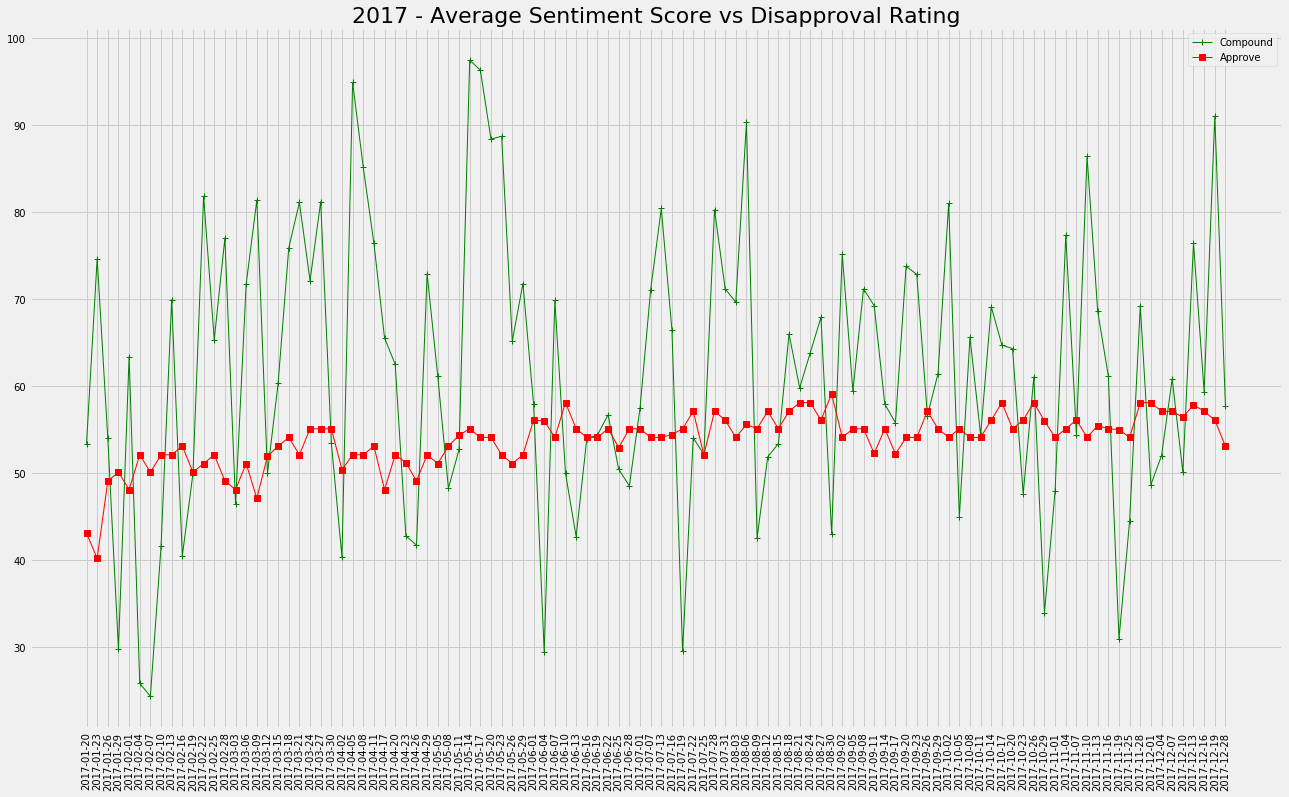

In [39]:
## Compound vs Approval
plt.figure(figsize=(20,12))
x_axis = correlate_df['Date']
plt.title('2017 - Average Sentiment Score vs Disapproval Rating', fontsize = 22)
# Create a handle for each plot
Compound = plt.plot(x_axis, correlate_df['Compound'], marker="+",color="Green", linewidth=1, label="Sentiment")
Approve = plt.plot(x_axis, correlate_df['Disapprove'], marker="s", color="Red", linewidth=1, label="Disapprove")
plt.xticks(rotation=90)
plt.legend((Compound[0], Approve[0]), ('Compound', 'Approve'))

plt.show()

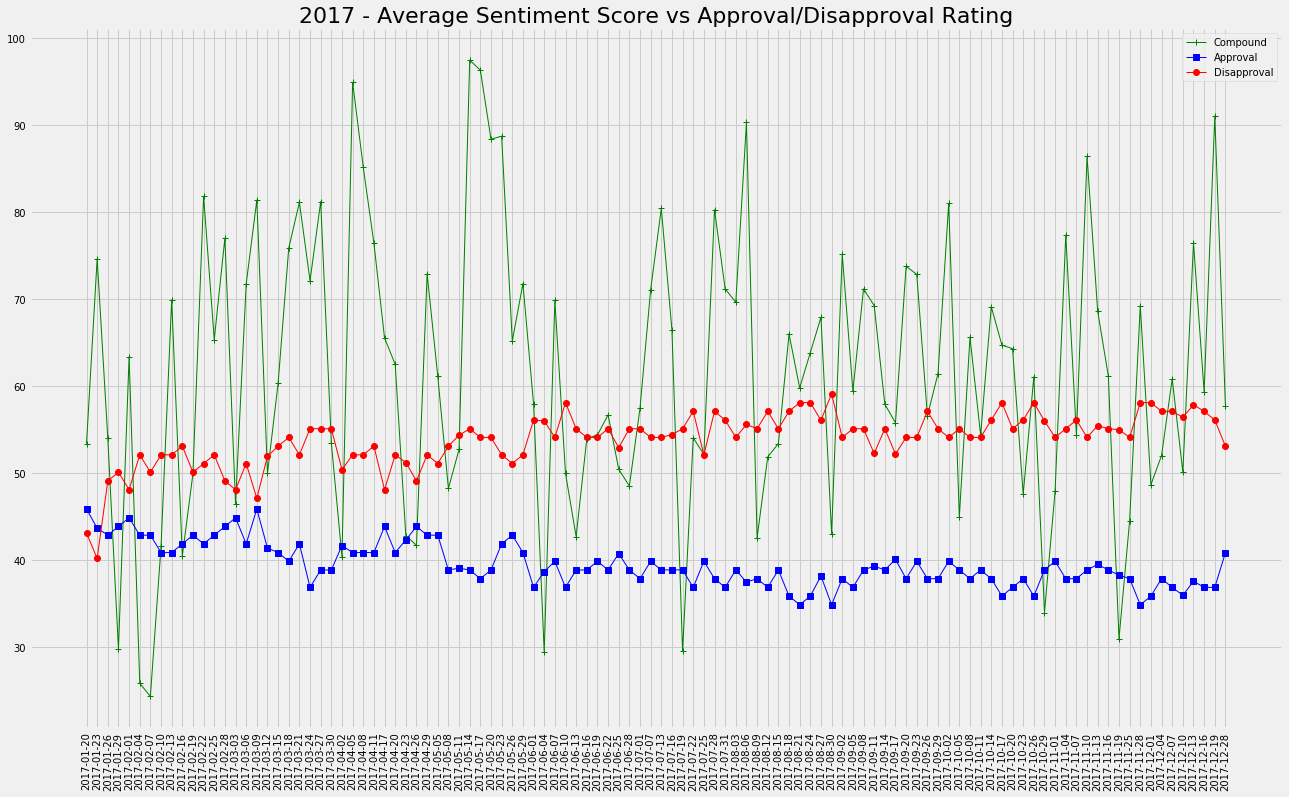

In [41]:
#Compound vs Approve vs Disapprove

#Plotting line graph for bottom 10 of narrowed values
plt.figure(figsize=(20,12))
x_axis = correlate_df['Date']
plt.title('2017 - Average Sentiment Score vs Approval/Disapproval Rating', fontsize = 22)

# Create a handle for each plot
Compound = plt.plot(x_axis, correlate_df['Compound'], marker="+",color="Green", linewidth=1, label="Sentiment")
Approve = plt.plot(x_axis, correlate_df['Approve'], marker="s", color="Blue", linewidth=1, label="Approve")
Disapprove = plt.plot(x_axis, correlate_df['Disapprove'], marker="o", color="Red", linewidth=1, label="Disapprove")
plt.legend((Compound[0], Approve[0],Disapprove[0]), ('Compound', 'Approval', 'Disapproval'))
plt.xticks(rotation=90)


plt.show()

## Stock Market Comparision:

In [42]:
df2.head()

,Compound,Count,Date,Open,High,Low,Close,Adj Close,Volume,Avg Return
0,53.423636,11.0,2017-01-20,2269.959961,2276.959961,2265.010010,-3130.571636,2271.310059,3.524970e+09,0.059477
1,71.843333,3.0,2017-01-21,2269.959961,2276.959961,2265.010010,-3229.000421,2271.310059,3.524970e+09,0.059477
2,62.220000,4.0,2017-01-22,2269.959961,2276.959961,2265.010010,-3295.286343,2271.310059,3.524970e+09,0.059477
3,74.695000,1.0,2017-01-23,2267.780029,2271.780029,2257.020020,-3320.143343,2265.199951,3.152710e+09,-0.113771
4,67.711250,4.0,2017-01-24,2267.879883,2284.629883,2266.679932,-2989.142714,2280.070068,3.810960e+09,0.537515


In [43]:
correlate_df.head()


,Date,Compound,Approve,Disapprove
0,2017-01-20,53.423636,45.90613,43.14093
3,2017-01-23,74.695000,43.71903,40.23624
6,2017-01-26,54.040909,42.90613,49.14093
9,2017-01-29,29.831429,43.90613,50.14093
12,2017-02-01,63.415000,44.90613,48.14093


In [44]:
merged_data = pd.merge(correlate_df, df2, how='inner', on='Date')
merged_data.head()

,Date,Compound_x,Approve,Disapprove,Compound_y,Count,Open,High,Low,Close,Adj Close,Volume,Avg Return
0,2017-01-20,53.423636,45.90613,43.14093,53.423636,11.0,2269.959961,2276.959961,2265.010010,-3130.571636,2271.310059,3.524970e+09,0.059477
1,2017-01-23,74.695000,43.71903,40.23624,74.695000,1.0,2267.780029,2271.780029,2257.020020,-3320.143343,2265.199951,3.152710e+09,-0.113771
2,2017-01-26,54.040909,42.90613,49.14093,54.040909,11.0,2298.629883,2300.989990,2294.080078,-2762.428500,2296.679932,3.610360e+09,-0.084831
3,2017-01-29,29.831429,43.90613,50.14093,29.831429,7.0,2299.020020,2299.020020,2291.620117,-2755.714636,2294.689941,3.135890e+09,-0.188345
4,2017-02-01,63.415000,44.90613,48.14093,63.415000,4.0,2285.590088,2289.139893,2272.439941,-2591.999164,2279.550049,3.916610e+09,-0.264266


In [45]:
Stockmerged_data = merged_data.drop(["Compound_x", "Count", "Adj Close"], axis=1)
Stockmerged_data = Stockmerged_data.rename(columns={"Compound_y": "Compound"})

Stockmerged_data.head()

,Date,Approve,Disapprove,Compound,Open,High,Low,Close,Volume,Avg Return
0,2017-01-20,45.90613,43.14093,53.423636,2269.959961,2276.959961,2265.010010,-3130.571636,3.524970e+09,0.059477
1,2017-01-23,43.71903,40.23624,74.695000,2267.780029,2271.780029,2257.020020,-3320.143343,3.152710e+09,-0.113771
2,2017-01-26,42.90613,49.14093,54.040909,2298.629883,2300.989990,2294.080078,-2762.428500,3.610360e+09,-0.084831
3,2017-01-29,43.90613,50.14093,29.831429,2299.020020,2299.020020,2291.620117,-2755.714636,3.135890e+09,-0.188345
4,2017-02-01,44.90613,48.14093,63.415000,2285.590088,2289.139893,2272.439941,-2591.999164,3.916610e+09,-0.264266


In [46]:
Stockmerged_data.describe()

,Approve,Disapprove,Compound,Open,High,Low,Close,Volume,Avg Return
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,1.080000e+02,108.000000
mean,39.516903,53.887088,61.512472,2452.099164,2458.648786,2446.100188,-666.943085,3.444041e+09,0.063459
std,2.495989,3.055667,16.055983,101.785133,102.004736,102.250929,1227.143541,5.904318e+08,0.343261
min,34.906130,40.236240,24.380000,2267.780029,2271.780029,2257.020020,-3320.143343,1.349780e+09,-1.483619
25%,37.906130,52.140930,50.394375,2372.232544,2381.147461,2362.930054,-1434.357125,3.146052e+09,-0.104570
50%,38.906130,54.140930,61.134795,2436.894898,2444.584961,2432.275024,-812.785993,3.408695e+09,0.056705
75%,40.906130,55.736240,71.908125,2512.769959,2521.887451,2511.092468,207.090104,3.653658e+09,0.301994
max,45.906130,59.140930,97.505000,2692.709961,2694.439941,2682.689941,2066.071429,5.723920e+09,0.809692


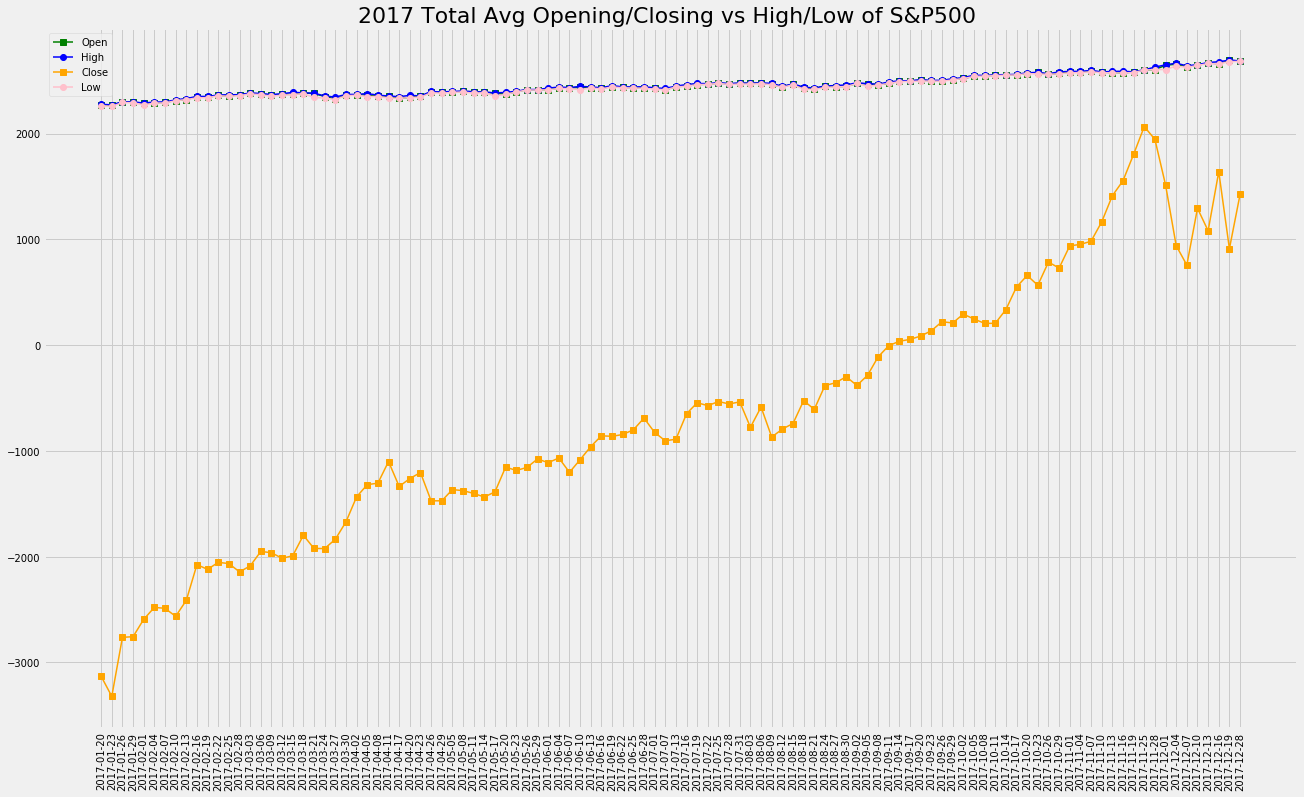

In [63]:
plt.figure(figsize=(20,12))
x_axis = Stockmerged_data['Date']
plt.title('2017 Total Avg Opening/Closing vs High/Low of S&P500 ', fontsize = 22)
# Create a handle for each plot
Open = plt.plot(x_axis, Stockmerged_data['Open'], marker="s", color="Green", linewidth=1.5, label="Open")
High = plt.plot(x_axis, Stockmerged_data['High'], marker="o",color="Blue", linewidth=1.5, label="High")
Close = plt.plot(x_axis, Stockmerged_data['Close'], marker="s", color="Orange", linewidth=1.5, label="Close")
Low = plt.plot(x_axis, Stockmerged_data['Low'], marker="o", color="Pink", linewidth=1.5, label="Low")

plt.xticks(rotation=90)
plt.legend((Open[0],High[0],Close[0],Low[0]), ( 'Open','High','Close', 'Low'))




plt.show()



In [67]:
#narrow the data for Closing 
#Narrowing data using the standard deviation
Stockmerged_dataClose = Stockmerged_data.loc[(Stockmerged_data['Date'] > '2017-08-11') & (Stockmerged_data['Date'] < '2017-10-11')]
Stockmerged_dataClose.head()

,Date,Approve,Disapprove,Compound,Open,High,Low,Close,Volume,Avg Return
64,2017-08-12,36.90613,57.14093,51.906667,2441.040039,2448.090088,2437.850098,-793.071636,3.159930e+09,0.011472
65,2017-08-15,38.90613,55.14093,53.428500,2468.659912,2468.899902,2461.610107,-740.713936,2.913100e+09,-0.164049
66,2017-08-18,35.90613,57.14093,66.028125,2427.639893,2440.270020,2420.689941,-524.642507,3.415680e+09,-0.086085
67,2017-08-21,34.90613,58.14093,59.840000,2425.500000,2430.580078,2417.350098,-606.427871,2.788150e+09,0.118331
68,2017-08-24,35.90613,58.14093,63.890333,2447.909912,2450.389893,2436.189941,-382.285857,2.846590e+09,-0.365207


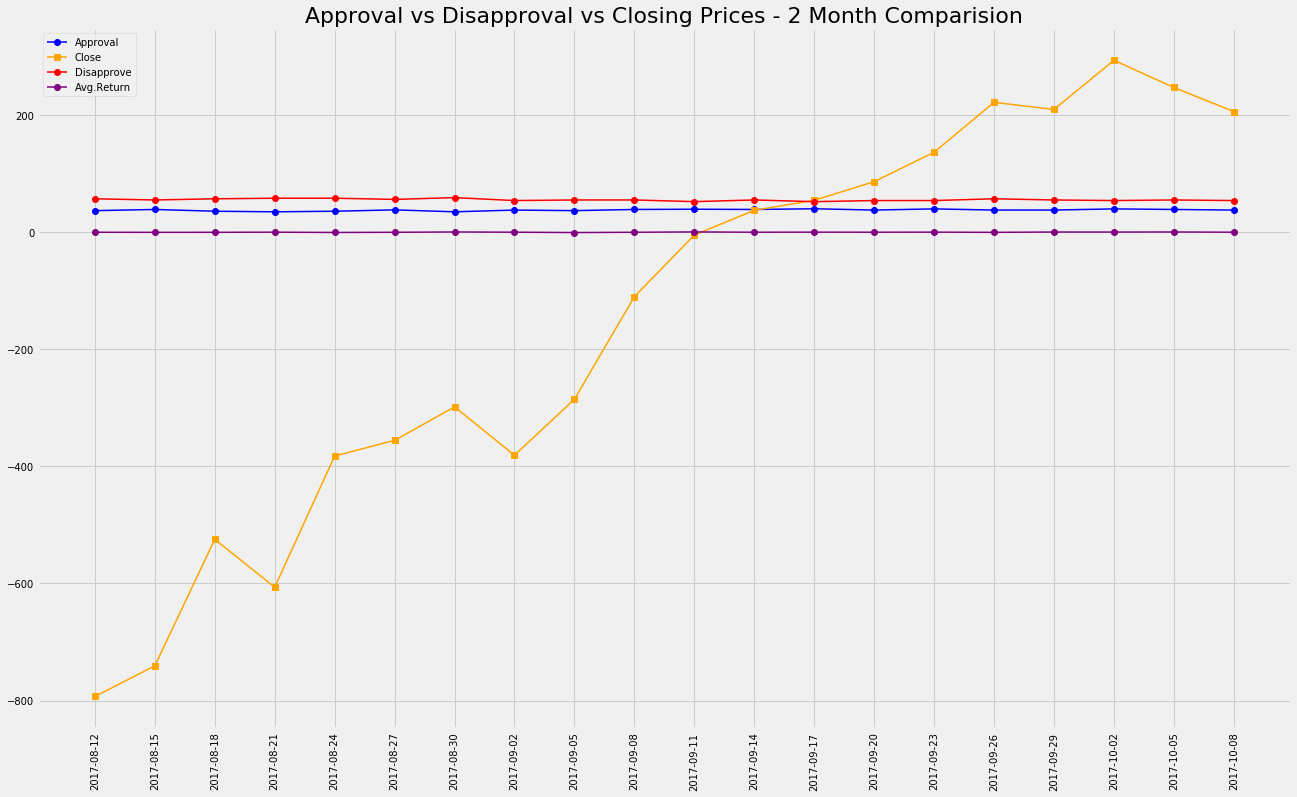

In [54]:
#Approval vs Disapproval vs Closing Prices
plt.figure(figsize=(20,12))
x_axis = Stockmerged_dataClose['Date']
plt.title('Approval vs Disapproval vs Closing Prices - 2 Month Comparision', fontsize = 22)
# Create a handle for each plot
Approve = plt.plot(x_axis, Stockmerged_dataClose['Approve'], marker="o",color="Blue", linewidth=1.5, label="Approve")
Close = plt.plot(x_axis, Stockmerged_dataClose['Close'], marker="s", color="Orange", linewidth=1.5, label="Close")
Disapprove = plt.plot(x_axis, Stockmerged_dataClose['Disapprove'], marker="o", color="Red", linewidth=1.5, label="Disapprove")
Return = plt.plot(x_axis, Stockmerged_dataClose['Avg Return'], marker="o", color="Purple", linewidth=1.5, label="Avg Return")


plt.legend((Approve[0],Close[0],Disapprove[0],Return[0]), ('Approval','Close', 'Disapprove','Avg.Return'))
plt.xticks(rotation=90)



plt.show()


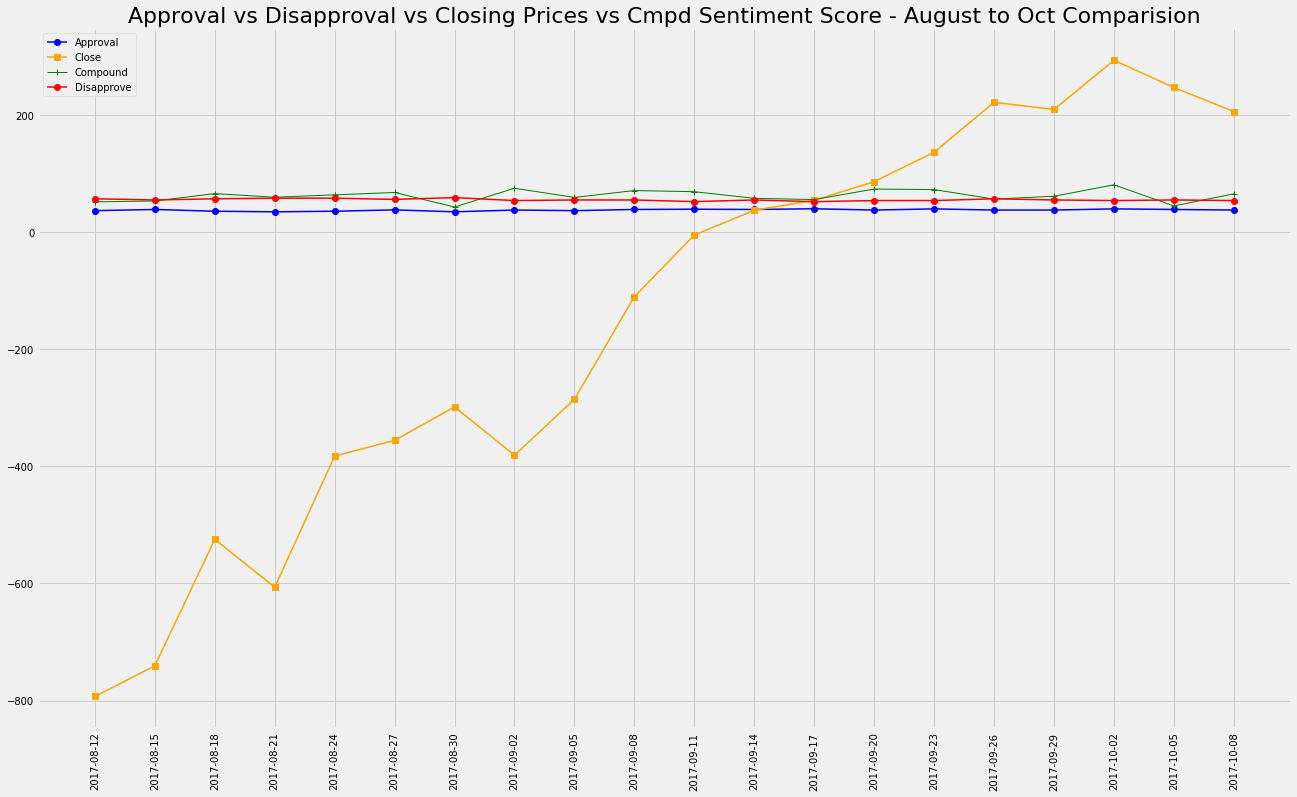

In [70]:
#Approval vs Disapproval vs Closing Prices
plt.figure(figsize=(20,12))
x_axis = Stockmerged_dataClose['Date']
plt.title('Approval vs Disapproval vs Closing Prices vs Cmpd Sentiment Score - August to Oct Comparision', fontsize = 22)
# Create a handle for each plot
Approve = plt.plot(x_axis, Stockmerged_dataClose['Approve'], marker="o",color="Blue", linewidth=1.5, label="Approve")
Close = plt.plot(x_axis, Stockmerged_dataClose['Close'], marker="s", color="Orange", linewidth=1.5, label="Close")
Compound = plt.plot(x_axis, Stockmerged_dataClose['Compound'], marker="+",color="Green", linewidth=1, label="Compound")
Disapprove = plt.plot(x_axis, Stockmerged_dataClose['Disapprove'], marker="o", color="Red", linewidth=1.5, label="Disapprove")

plt.legend((Approve[0],Close[0],Compound[0],Disapprove[0]), ('Approval', 'Close', 'Compound','Disapprove'))




plt.xticks(rotation=90)


plt.show()



In [58]:
#Lets look at 2 different months: 
Stockmerged_dataSpring = Stockmerged_data.loc[(Stockmerged_data['Date'] > '2017-03-01') & (Stockmerged_data['Date'] < '2017-05-01')]
Stockmerged_dataSpring.head()

,Date,Approve,Disapprove,Compound,Open,High,Low,Close,Volume,Avg Return
14,2017-03-03,44.906130,48.14093,46.530769,2380.919922,2383.889893,2375.389893,-2086.928014,3.555260e+09,0.092409
15,2017-03-06,41.906130,51.14093,71.773750,2375.229980,2378.800049,2367.979980,-1950.143000,3.232700e+09,0.003371
16,2017-03-09,45.906130,47.14093,81.431250,2363.489990,2369.080078,2354.540039,-1961.999514,3.716340e+09,0.058394
17,2017-03-12,41.427062,51.97496,50.000000,2372.520020,2376.860107,2363.040039,-2015.072193,3.432950e+09,0.003375
18,2017-03-15,40.906130,53.14093,60.362143,2370.340088,2390.010010,2368.939941,-1990.642436,3.906840e+09,0.629442


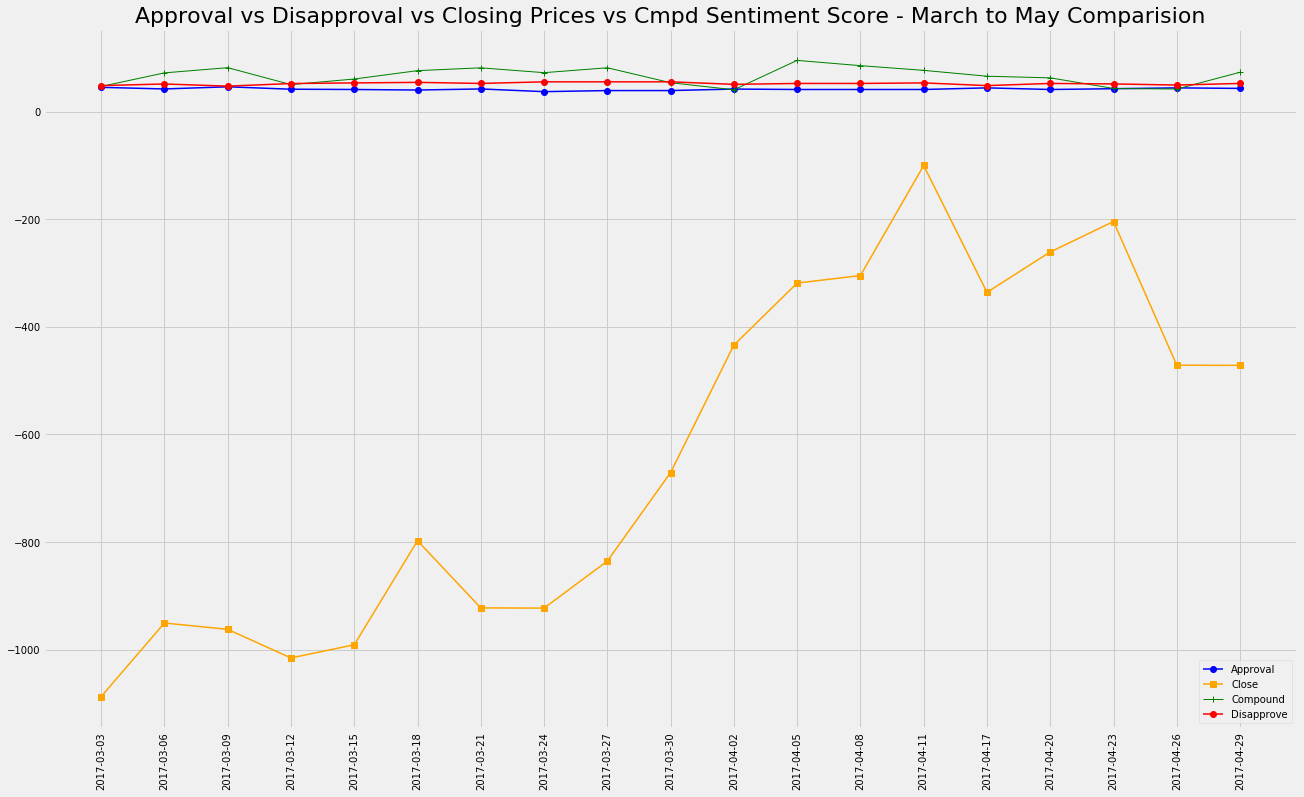

In [60]:
#Approval vs Disapproval vs Closing Prices
plt.figure(figsize=(20,12))
x_axis = Stockmerged_dataSpring['Date']
plt.title('Approval vs Disapproval vs Closing Prices vs Cmpd Sentiment Score - March to May Comparision', fontsize = 22)
# Create a handle for each plot
Approve = plt.plot(x_axis, Stockmerged_dataSpring['Approve'], marker="o",color="Blue", linewidth=1.5, label="Approve")
Close = plt.plot(x_axis, Stockmerged_dataSpring['Close']+1000, marker="s", color="Orange", linewidth=1.5, label="Close")
Compound = plt.plot(x_axis, Stockmerged_dataSpring['Compound'], marker="+",color="Green", linewidth=1, label="Compound")
Disapprove = plt.plot(x_axis, Stockmerged_dataSpring['Disapprove'], marker="o", color="Red", linewidth=1.5, label="Disapprove")
#Return = plt.plot(x_axis, Stockmerged_dataSpring['Avg Return'], marker="o", color="Purple", linewidth=1.5, label="Avg Return")


plt.legend((Approve[0],Close[0],Compound[0],Disapprove[0]), ('Approval', 'Close', 'Compound','Disapprove'))




plt.xticks(rotation=90)


plt.show()



In [61]:
#Lets look at 2 different months:  Winter
Stockmerged_dataWinter = Stockmerged_data.loc[(Stockmerged_data['Date'] > '2017-10-20') & (Stockmerged_data['Date'] < '2017-12-30')]
Stockmerged_dataWinter.head()

,Date,Approve,Disapprove,Compound,Open,High,Low,Close,Volume,Avg Return
88,2017-10-23,37.90613,56.14093,47.623750,2578.080078,2578.290039,2564.330078,566.214429,3.211710e+09,-0.508134
89,2017-10-26,35.90613,58.14093,61.099091,2560.080078,2567.070068,2559.800049,785.642786,3.869050e+09,0.012493
90,2017-10-29,38.91903,56.03624,34.015833,2570.260010,2582.979980,2565.939941,728.642929,3.887110e+09,0.420582
91,2017-11-01,39.90613,54.14093,48.019000,2583.209961,2588.399902,2574.919922,939.071221,3.813180e+09,-0.149034
92,2017-11-04,37.90613,55.14093,77.399000,2581.929932,2588.419922,2576.770020,952.429200,3.567710e+09,0.228905


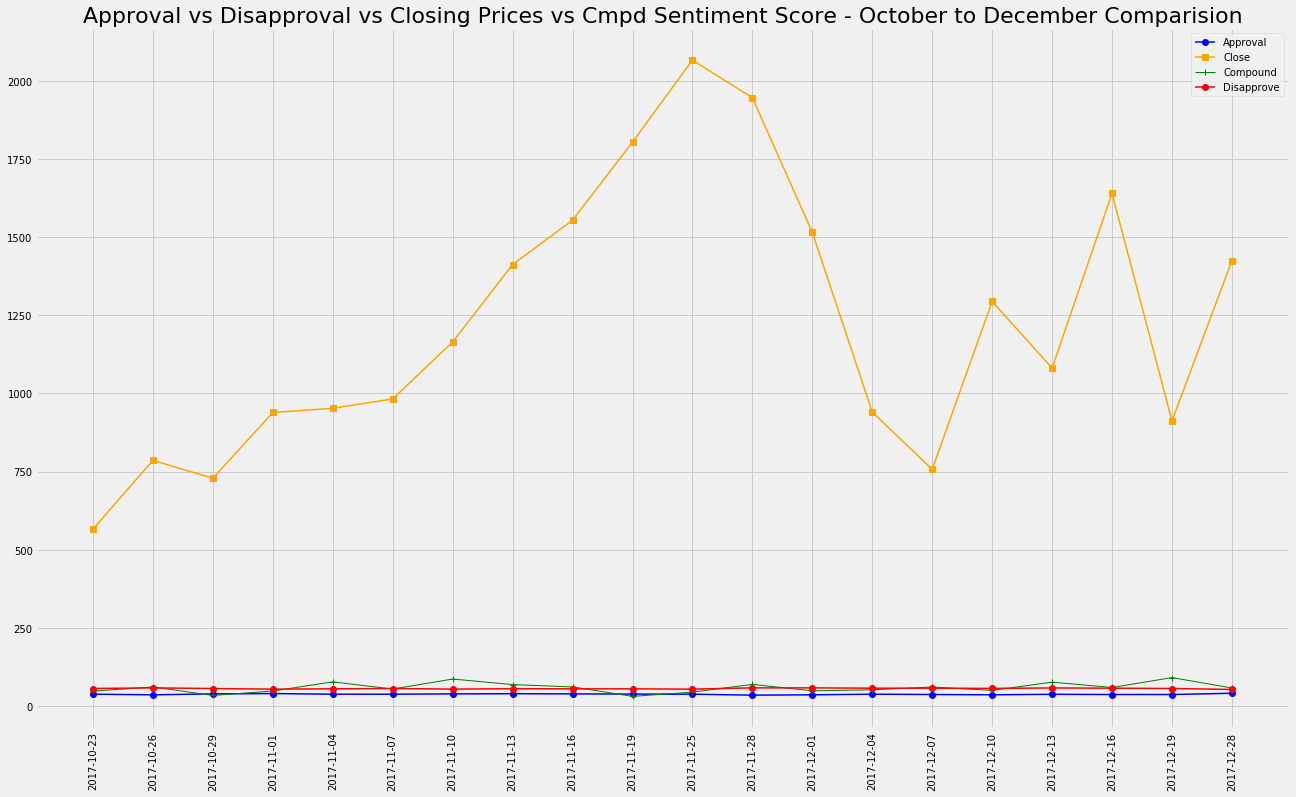

In [62]:
#Approval vs Disapproval vs Closing Prices
plt.figure(figsize=(20,12))
x_axis = Stockmerged_dataWinter['Date']
plt.title('Approval vs Disapproval vs Closing Prices vs Cmpd Sentiment Score - October to December Comparision', fontsize = 22)
Approve = plt.plot(x_axis, Stockmerged_dataWinter['Approve'], marker="o",color="Blue", linewidth=1.5, label="Approve")
Close = plt.plot(x_axis, Stockmerged_dataWinter['Close'], marker="s", color="Orange", linewidth=1.5, label="Close")
Compound = plt.plot(x_axis, Stockmerged_dataWinter['Compound'], marker="+",color="Green", linewidth=1, label="Compound")
Disapprove = plt.plot(x_axis, Stockmerged_dataWinter['Disapprove'], marker="o", color="Red", linewidth=1.5, label="Disapprove")
#Return = plt.plot(x_axis, Stockmerged_dataWinter['Avg Return'], marker="o", color="Purple", linewidth=1.5, label="Avg Return")


plt.legend((Approve[0],Close[0],Compound[0],Disapprove[0]), ('Approval', 'Close', 'Compound','Disapprove'))





plt.xticks(rotation=90)


plt.show()

